In [0]:
import pandas as pd
import numpy as np
import math
from statistics import mean 
import os
import random
import string
import time
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import torch
from torch import nn
from torch.autograd import Variable
import torch.utils.data as data_utils
from torch.utils.data.sampler import SubsetRandomSampler
import torch.nn.functional as F
from torch.nn import Linear, ReLU, CrossEntropyLoss, Sequential, Conv2d, MaxPool2d, AvgPool2d, Module, Softmax, BatchNorm2d, Dropout
from torch import optim
from torch.optim import Adam, SGD
import torchvision
from torchvision import datasets, transforms
import torchvision.utils as vutils
from IPython.display import HTML

Extracting ./FashionMNIST/raw/train-images-idx3-ubyte.gz to ./FashionMNIST/raw



Extracting ./FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./FashionMNIST/raw


Extracting ./FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./FashionMNIST/raw


Extracting ./FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./FashionMNIST/raw
Processing...
Done!
torch.Size([32, 1, 28, 28])
torch.Size([32])
label tensor(2)




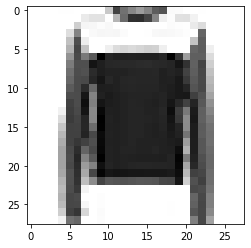


device cuda


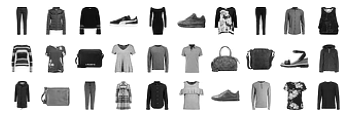

In [0]:
### Problem 2: GAN
## Part 1: Vanilla GAN
# Load data
batch_size = 32
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])

fmnist = torchvision.datasets.FashionMNIST(root="./", train=True, transform=transform, download=True)
data_loader = torch.utils.data.DataLoader(dataset=fmnist, batch_size=batch_size, shuffle=True)

#mnist = torchvision.datasets.MNIST(root="./", train=True, transform=transform, download=True)
#data_loader = torch.utils.data.DataLoader(dataset=mnist, batch_size=batch_size, shuffle=True)

#explore data
data_iter = iter(data_loader)
images, labels = data_iter.next()
print(images.shape)
print(labels.shape)
print('label',labels[0])
plt.imshow(images[0].numpy().squeeze(), cmap='gray_r')
plt.show()

figure = plt.figure()
num_of_images = 30
for index in range(1, num_of_images + 1):
    plt.subplot(6, 10, index)
    plt.axis('off')
    plt.imshow(images[index].numpy().squeeze(), cmap='gray_r')

# Decide which device we want to run on
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print('device', device)


Generator(
  (embed): Embedding(10, 10)
  (model): Sequential(
    (0): Linear(in_features=110, out_features=256, bias=True)
    (1): LeakyReLU(negative_slope=0.2, inplace=True)
    (2): Linear(in_features=256, out_features=512, bias=True)
    (3): LeakyReLU(negative_slope=0.2, inplace=True)
    (4): Linear(in_features=512, out_features=1024, bias=True)
    (5): LeakyReLU(negative_slope=0.2, inplace=True)
    (6): Linear(in_features=1024, out_features=784, bias=True)
    (7): Tanh()
  )
)
Discriminator(
  (embed): Embedding(10, 10)
  (model): Sequential(
    (0): Linear(in_features=794, out_features=1024, bias=True)
    (1): LeakyReLU(negative_slope=0.2, inplace=True)
    (2): Dropout(p=0.3, inplace=False)
    (3): Linear(in_features=1024, out_features=512, bias=True)
    (4): LeakyReLU(negative_slope=0.2, inplace=True)
    (5): Dropout(p=0.3, inplace=False)
    (6): Linear(in_features=512, out_features=256, bias=True)
    (7): LeakyReLU(negative_slope=0.2, inplace=True)
    (8): Dropo

/usr/local/lib/python3.6/dist-packages/torch/nn/modules/loss.py:498: UserWarning: Using a target size (torch.Size([32])) that is different to the input size (torch.Size([32, 1])) is deprecated. Please ensure they have the same size.
  return F.binary_cross_entropy(input, target, weight=self.weight, reduction=self.reduction)


Epoch: 0 G Loss: 4.17724957186381 D Loss: 0.4021280327185988 Runtime: 35.773754596710205
D(x): 0.9007414798895518 D(G(z)): 0.1380691994809856 / 0.08199192763993828


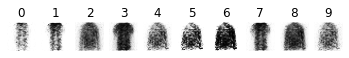

Epoch: 1 G Loss: 2.8149750694274904 D Loss: 0.5687066806872686 Runtime: 36.84690856933594
D(x): 0.8314805355072021 D(G(z)): 0.17699962250590323 / 0.14170663291364907


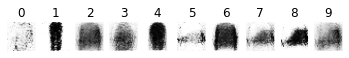

Epoch: 2 G Loss: 1.978833068593343 D Loss: 0.7741798774639765 Runtime: 36.386929988861084
D(x): 0.75938678967158 D(G(z)): 0.24910284347931544 / 0.21821762462854385


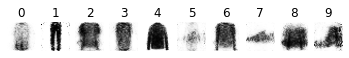

Epoch: 3 G Loss: 1.4453499951998392 D Loss: 0.9803084545294444 Runtime: 36.22045540809631
D(x): 0.6814616233189901 D(G(z)): 0.32367647682031 / 0.29403223586877186


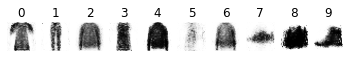

Epoch: 4 G Loss: 1.246986427752177 D Loss: 1.0570706350485484 Runtime: 36.47310423851013
D(x): 0.6504682645320893 D(G(z)): 0.3564756829897563 / 0.33164852243264514


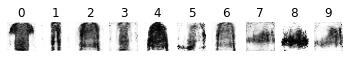

Epoch: 5 G Loss: 1.217711264737447 D Loss: 1.0732016366958619 Runtime: 36.92443537712097
D(x): 0.643756300719579 D(G(z)): 0.362387162621816 / 0.3362582848310471


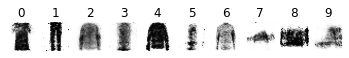

Epoch: 6 G Loss: 1.2691466610908508 D Loss: 1.0515296040217081 Runtime: 36.04424595832825
D(x): 0.6530185095469156 D(G(z)): 0.35405875360171 / 0.3255900647322337


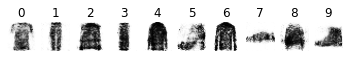

Epoch: 7 G Loss: 1.2133679728507996 D Loss: 1.0717899822552999 Runtime: 37.196739196777344
D(x): 0.6426228403568268 D(G(z)): 0.3614828919092814 / 0.33861244852542877


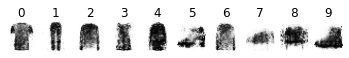

Epoch: 8 G Loss: 1.1287552669207255 D Loss: 1.1190921443939208 Runtime: 35.882203340530396
D(x): 0.6230015097141266 D(G(z)): 0.3798240880250931 / 0.3586929273207982


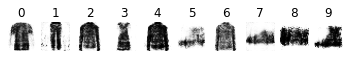

Epoch: 9 G Loss: 1.1361377483050028 D Loss: 1.11664580783844 Runtime: 35.94253087043762
D(x): 0.6244583835442861 D(G(z)): 0.37926592082977295 / 0.3575367053667704


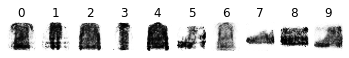

Epoch: 10 G Loss: 1.120799752076467 D Loss: 1.1239175680478415 Runtime: 35.34943962097168
D(x): 0.6222723405996958 D(G(z)): 0.38185868802865347 / 0.36178648711045586


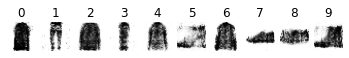

Epoch: 11 G Loss: 1.0853195148785908 D Loss: 1.1468764169692993 Runtime: 35.424546241760254
D(x): 0.6128498431841533 D(G(z)): 0.39115114509264626 / 0.37157778770128885


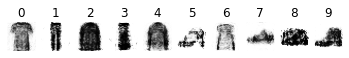

Epoch: 12 G Loss: 1.0965434999783834 D Loss: 1.1415538672765095 Runtime: 34.49325966835022
D(x): 0.6140548535029093 D(G(z)): 0.38831498878796894 / 0.36895461218357084


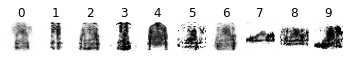

Epoch: 13 G Loss: 1.0826305383046468 D Loss: 1.1516917416890462 Runtime: 35.09134125709534
D(x): 0.60984494155248 D(G(z)): 0.39157744245529175 / 0.37272521408398945


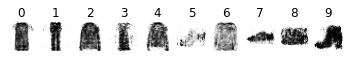

Epoch: 14 G Loss: 1.0324706956863403 D Loss: 1.183168741575877 Runtime: 35.2663950920105
D(x): 0.5975434742768606 D(G(z)): 0.4047293890317281 / 0.38792784283161164


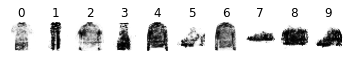

Epoch: 15 G Loss: 1.0509459685643514 D Loss: 1.1662002228418986 Runtime: 34.92632746696472
D(x): 0.6033819173812867 D(G(z)): 0.39808646683692933 / 0.3808689772049586


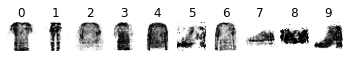

Epoch: 16 G Loss: 1.024044627571106 D Loss: 1.1927393279393514 Runtime: 35.13894176483154
D(x): 0.5913953184922536 D(G(z)): 0.4060093511104584 / 0.3898586383024851


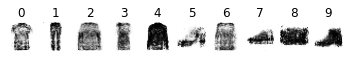

Epoch: 17 G Loss: 1.023500001335144 D Loss: 1.1945875909487407 Runtime: 35.81641507148743
D(x): 0.5920134246508281 D(G(z)): 0.40772248253822324 / 0.389941352335612


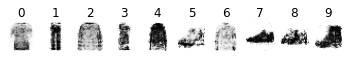

Epoch: 18 G Loss: 1.0153995237032571 D Loss: 1.1991177680651346 Runtime: 35.57390260696411
D(x): 0.5904696698188782 D(G(z)): 0.4095892093976339 / 0.3925285839557648


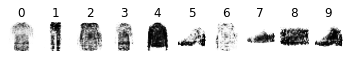

Epoch: 19 G Loss: 0.9920352774302165 D Loss: 1.2059127738952637 Runtime: 35.02699851989746
D(x): 0.587321044699351 D(G(z)): 0.4135361232916514 / 0.39844391878445945


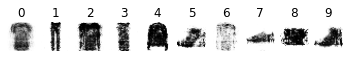

Epoch: 20 G Loss: 1.0114619633992512 D Loss: 1.2010849830945334 Runtime: 36.248533964157104
D(x): 0.5893227845827739 D(G(z)): 0.41036746083895365 / 0.3939221395810445


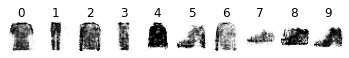

Epoch: 21 G Loss: 0.9913846984863282 D Loss: 1.2087814661343892 Runtime: 36.17818355560303
D(x): 0.5851737377643585 D(G(z)): 0.4137210460662842 / 0.39879934866428374


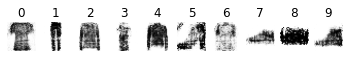

Epoch: 22 G Loss: 0.993889421304067 D Loss: 1.2141920667648316 Runtime: 35.6650755405426
D(x): 0.5843484203179677 D(G(z)): 0.4157689346154531 / 0.39950921462376915


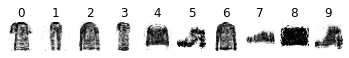

Epoch: 23 G Loss: 0.9871749046961467 D Loss: 1.2143973953882854 Runtime: 35.38237428665161
D(x): 0.5837385241190592 D(G(z)): 0.41559965704282126 / 0.4010357211112976


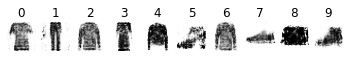

Epoch: 24 G Loss: 0.9692477311134339 D Loss: 1.2264717951774597 Runtime: 35.396745443344116
D(x): 0.5786961467107137 D(G(z)): 0.42079636710484825 / 0.4069742264588674


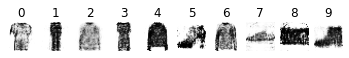

Epoch: 25 G Loss: 0.9875563839276632 D Loss: 1.2213459466934204 Runtime: 36.30961585044861
D(x): 0.5806058358669282 D(G(z)): 0.4176206926981608 / 0.4011482849597931


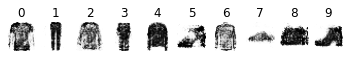

Epoch: 26 G Loss: 0.9763153104146322 D Loss: 1.2246403738975524 Runtime: 35.32503890991211
D(x): 0.579973960796992 D(G(z)): 0.4203083696365356 / 0.40527285823822023


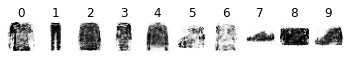

Epoch: 27 G Loss: 0.96636042470932 D Loss: 1.2355570512771605 Runtime: 34.61259746551514
D(x): 0.5731076786041259 D(G(z)): 0.42254628264109295 / 0.40645474526087444


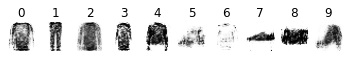

Epoch: 28 G Loss: 1.005235117562612 D Loss: 1.2124065640767416 Runtime: 35.62834858894348
D(x): 0.5863266518751781 D(G(z)): 0.41340927725632987 / 0.39652016921838124


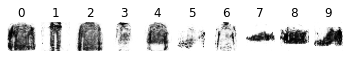

Epoch: 29 G Loss: 0.9846143773396809 D Loss: 1.2177905439694723 Runtime: 34.75923681259155
D(x): 0.5834572531382243 D(G(z)): 0.4171346176783244 / 0.4031804526249568


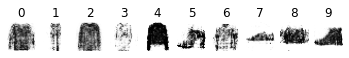

Epoch: 30 G Loss: 0.950628021812439 D Loss: 1.2385620404561362 Runtime: 34.992273807525635
D(x): 0.573515431133906 D(G(z)): 0.42576377663612364 / 0.41225516262054446


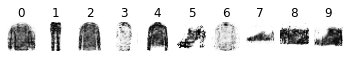

Epoch: 31 G Loss: 0.9422340642293294 D Loss: 1.2493934910774231 Runtime: 35.366344928741455
D(x): 0.5686612441062927 D(G(z)): 0.4285736533800761 / 0.41478686343828836


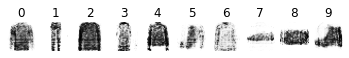

Epoch: 32 G Loss: 0.9483616431236267 D Loss: 1.242478012307485 Runtime: 35.13507580757141
D(x): 0.5726833760420481 D(G(z)): 0.42734158604939776 / 0.4131430006504059


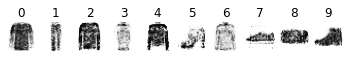

Epoch: 33 G Loss: 0.961464587243398 D Loss: 1.2371016752878825 Runtime: 35.17948627471924
D(x): 0.5750403754234314 D(G(z)): 0.4243049901008606 / 0.40947825298309326


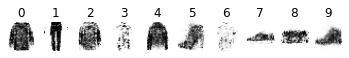

Epoch: 34 G Loss: 0.9394509209314982 D Loss: 1.2470358165423074 Runtime: 34.96654653549194
D(x): 0.5701866873423258 D(G(z)): 0.4293917361418406 / 0.4154664838949839


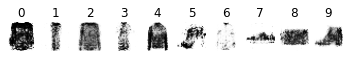

Epoch: 35 G Loss: 0.9446798533757528 D Loss: 1.253493362649282 Runtime: 34.99420738220215
D(x): 0.5678701283772787 D(G(z)): 0.4292837419350942 / 0.41527812274297077


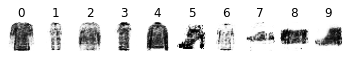

Epoch: 36 G Loss: 0.9611464846611023 D Loss: 1.2395939045270283 Runtime: 35.50190448760986
D(x): 0.574837552134196 D(G(z)): 0.42535429050127666 / 0.4103148822863897


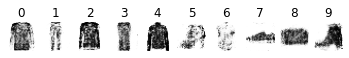

Epoch: 37 G Loss: 0.9402253582318624 D Loss: 1.2500907257080078 Runtime: 35.51898217201233
D(x): 0.5695862664699555 D(G(z)): 0.4293993917306264 / 0.41661873304049174


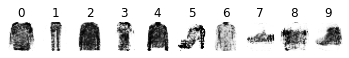

Epoch: 38 G Loss: 0.9304992507934571 D Loss: 1.2562952779452006 Runtime: 34.993459939956665
D(x): 0.5662753162860871 D(G(z)): 0.43247882908185326 / 0.4187727897961934


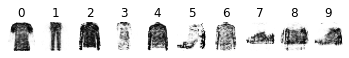

Epoch: 39 G Loss: 0.9356628656387329 D Loss: 1.255869390265147 Runtime: 35.496267795562744
D(x): 0.5678151349703471 D(G(z)): 0.43192211960156757 / 0.417657505830129


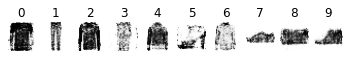

Epoch: 40 G Loss: 0.9165185581843058 D Loss: 1.261676777013143 Runtime: 36.28630471229553
D(x): 0.5649427574475606 D(G(z)): 0.43629919967651365 / 0.4233725256443024


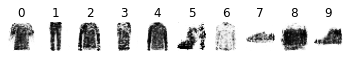

Epoch: 41 G Loss: 0.9304141005198161 D Loss: 1.2613300293922425 Runtime: 35.5116331577301
D(x): 0.5638934802691141 D(G(z)): 0.4327149752775828 / 0.41907810513178506


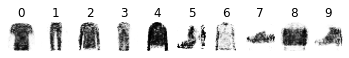

Epoch: 42 G Loss: 0.9296843528429667 D Loss: 1.2626961703300477 Runtime: 35.356860876083374
D(x): 0.5658203514734904 D(G(z)): 0.43418462540308633 / 0.42121813979943595


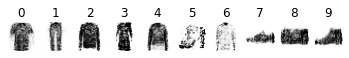

Epoch: 43 G Loss: 0.9448944345474243 D Loss: 1.2555388847986857 Runtime: 35.27291440963745
D(x): 0.5693943268140157 D(G(z)): 0.43057031160990394 / 0.4176112373510997


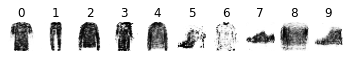

Epoch: 44 G Loss: 0.9158301671346029 D Loss: 1.2695613836924236 Runtime: 35.161510944366455
D(x): 0.5611338525454204 D(G(z)): 0.43766699074904125 / 0.42394915137290956


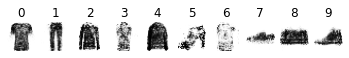

Epoch: 45 G Loss: 0.8983553540229797 D Loss: 1.2745137224197387 Runtime: 35.4318745136261
D(x): 0.5586816421190898 D(G(z)): 0.44050099093119305 / 0.4292341948668162


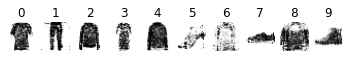

Epoch: 46 G Loss: 0.906332889175415 D Loss: 1.2789316372235615 Runtime: 34.99193859100342
D(x): 0.558604095808665 D(G(z)): 0.44042764169375104 / 0.42764343088467915


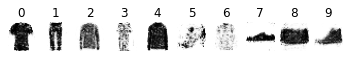

Epoch: 47 G Loss: 0.9081041929562886 D Loss: 1.2732268156369526 Runtime: 35.69403672218323
D(x): 0.559849269024531 D(G(z)): 0.4390670223871867 / 0.4269252728780111


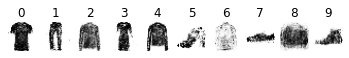

Epoch: 48 G Loss: 0.9038796820958456 D Loss: 1.2789196997960408 Runtime: 35.101778745651245
D(x): 0.5578867189248403 D(G(z)): 0.4408220271905263 / 0.4287163504123688


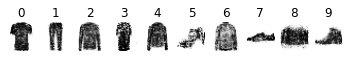

Epoch: 49 G Loss: 0.917979980023702 D Loss: 1.2787632202466328 Runtime: 36.43530058860779
D(x): 0.5592210950374603 D(G(z)): 0.4390091046492259 / 0.42558079115549724


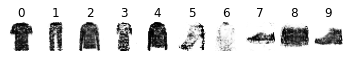

Epoch: 50 G Loss: 0.9055570299466451 D Loss: 1.2755875243186952 Runtime: 35.482218742370605
D(x): 0.5594307475566864 D(G(z)): 0.4398885641733805 / 0.42736666270891827


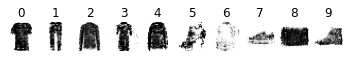

Epoch: 51 G Loss: 0.8887320963223775 D Loss: 1.283426319917043 Runtime: 36.05659747123718
D(x): 0.5554129854996999 D(G(z)): 0.4439564807097117 / 0.4328177706877391


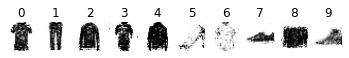

Epoch: 52 G Loss: 0.90708773021698 D Loss: 1.275191451772054 Runtime: 35.42322278022766
D(x): 0.55968933801651 D(G(z)): 0.4397964330355326 / 0.42743029335339866


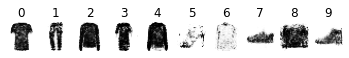

Epoch: 53 G Loss: 0.8875189997673034 D Loss: 1.292781190554301 Runtime: 35.63945198059082
D(x): 0.5527706775665283 D(G(z)): 0.4462879513422648 / 0.4343176487763723


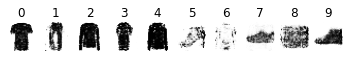

Epoch: 54 G Loss: 0.9110977980931599 D Loss: 1.2769569590250651 Runtime: 35.56210255622864
D(x): 0.559126886955897 D(G(z)): 0.4390374991416931 / 0.4275278853575389


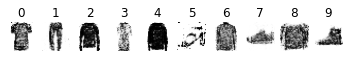

Epoch: 55 G Loss: 0.8785303832689921 D Loss: 1.28727812945048 Runtime: 36.91542077064514
D(x): 0.5545508497873942 D(G(z)): 0.44732405800819397 / 0.43686046980222065


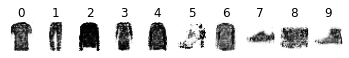

Epoch: 56 G Loss: 0.8817841306686401 D Loss: 1.294449790986379 Runtime: 36.60115671157837
D(x): 0.5522591363271078 D(G(z)): 0.44798116472562155 / 0.43568311007817584


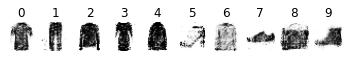

Epoch: 57 G Loss: 0.9099740601857503 D Loss: 1.2810659399032593 Runtime: 36.9598970413208
D(x): 0.5580522154490153 D(G(z)): 0.4407206331094106 / 0.42689844935735066


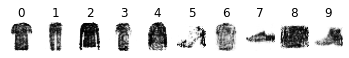

Epoch: 58 G Loss: 0.9182667217890421 D Loss: 1.2709600619633992 Runtime: 36.94212341308594
D(x): 0.5614975785573324 D(G(z)): 0.43735299836794533 / 0.42411504793167115


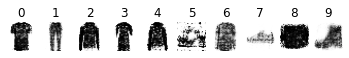

Epoch: 59 G Loss: 0.8720488152186076 D Loss: 1.2939772364298503 Runtime: 37.42093253135681
D(x): 0.5510133375644684 D(G(z)): 0.4485781361420949 / 0.4384567265669505


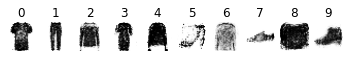

Epoch: 60 G Loss: 0.8927626103719075 D Loss: 1.2900310633341472 Runtime: 37.51743292808533
D(x): 0.5533591270446777 D(G(z)): 0.4449860627651215 / 0.4321973854700724


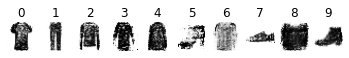

Epoch: 61 G Loss: 0.8905602598190308 D Loss: 1.288602437464396 Runtime: 37.72947072982788
D(x): 0.5547766678969065 D(G(z)): 0.4455793780485789 / 0.4328419230143229


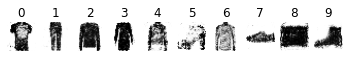

Epoch: 62 G Loss: 0.896122601032257 D Loss: 1.27860363073349 Runtime: 37.63183832168579
D(x): 0.5581404612223307 D(G(z)): 0.4415504005432129 / 0.4307910488764445


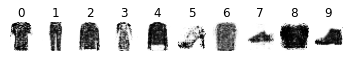

Epoch: 63 G Loss: 0.8752968974749247 D Loss: 1.2993509545644124 Runtime: 38.065983295440674
D(x): 0.5487683669090271 D(G(z)): 0.44891666242281597 / 0.43786470999717714


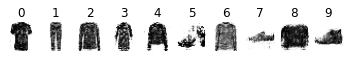

Epoch: 64 G Loss: 0.8664323119481404 D Loss: 1.3016172537167867 Runtime: 37.46812319755554
D(x): 0.5483994869073232 D(G(z)): 0.45159919346173605 / 0.4403938089052836


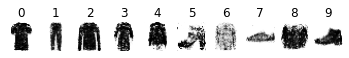

Epoch: 65 G Loss: 0.8869621534347534 D Loss: 1.2934406195640564 Runtime: 36.98738479614258
D(x): 0.5521001686096192 D(G(z)): 0.44607123068173726 / 0.4343370652675629


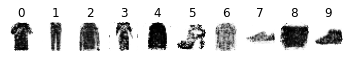

Epoch: 66 G Loss: 0.8756518293380737 D Loss: 1.295923932425181 Runtime: 37.17342495918274
D(x): 0.5506004446347554 D(G(z)): 0.44888924921353657 / 0.4380749581495921


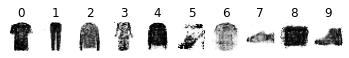

Epoch: 67 G Loss: 0.8792485889116923 D Loss: 1.2953601233482361 Runtime: 36.70599102973938
D(x): 0.5521393360614777 D(G(z)): 0.4480713765303294 / 0.43685670804977417


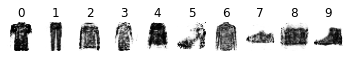

Epoch: 68 G Loss: 0.8598455708185831 D Loss: 1.3034469301859537 Runtime: 36.98206663131714
D(x): 0.5472165760676067 D(G(z)): 0.45314108244578044 / 0.4434227785587311


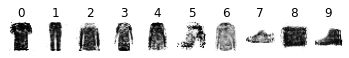

Epoch: 69 G Loss: 0.863094126256307 D Loss: 1.3099354409217834 Runtime: 36.50437259674072
D(x): 0.5453651888847351 D(G(z)): 0.4538767870426178 / 0.44262381092707315


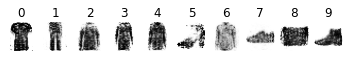

Epoch: 70 G Loss: 0.8759620372136434 D Loss: 1.2980868921279907 Runtime: 36.49486231803894
D(x): 0.5506251184622447 D(G(z)): 0.44881650439898174 / 0.43837600649197894


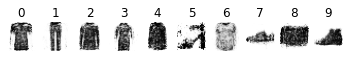

Epoch: 71 G Loss: 0.8499082964261373 D Loss: 1.3089543101628622 Runtime: 35.95134115219116
D(x): 0.5448187304973602 D(G(z)): 0.4556866762002309 / 0.4461703502496084


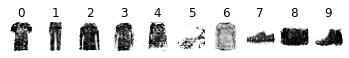

Epoch: 72 G Loss: 0.8827252900123597 D Loss: 1.3003270173072814 Runtime: 36.03470540046692
D(x): 0.5512616610209147 D(G(z)): 0.44936182532310487 / 0.4370351441542308


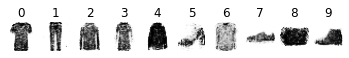

Epoch: 73 G Loss: 0.8609733545621236 D Loss: 1.3019655316670735 Runtime: 36.337453842163086
D(x): 0.5476346963723501 D(G(z)): 0.45238086822827656 / 0.4426631627559662


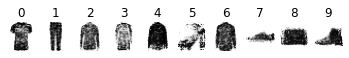

Epoch: 74 G Loss: 0.8688528090794881 D Loss: 1.3048407501220702 Runtime: 36.72790479660034
D(x): 0.5484569765885671 D(G(z)): 0.45155162717501324 / 0.44127747570673626


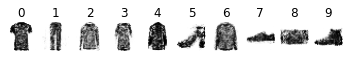

Epoch: 75 G Loss: 0.8765613959948222 D Loss: 1.302940872478485 Runtime: 36.21936750411987
D(x): 0.5484802263577779 D(G(z)): 0.4504040353298187 / 0.43847677578926086


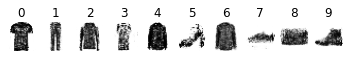

Epoch: 76 G Loss: 0.8774582695643107 D Loss: 1.294314691543579 Runtime: 36.879181146621704
D(x): 0.5530564183394114 D(G(z)): 0.44815089780489603 / 0.43764799186388653


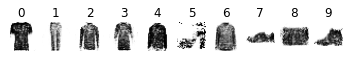

Epoch: 77 G Loss: 0.8665651037851969 D Loss: 1.3087829076449076 Runtime: 36.66548705101013
D(x): 0.5465086145242055 D(G(z)): 0.45258344229062397 / 0.44203570256233216


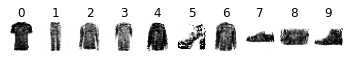

Epoch: 78 G Loss: 0.8512852313041687 D Loss: 1.3137428979873658 Runtime: 36.997695446014404
D(x): 0.5435352012634277 D(G(z)): 0.45642557600339256 / 0.44643980983098347


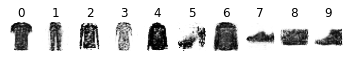

Epoch: 79 G Loss: 0.8781330114046733 D Loss: 1.3045053025563558 Runtime: 36.59899950027466
D(x): 0.5488911002000173 D(G(z)): 0.44952486645380657 / 0.4379551257610321


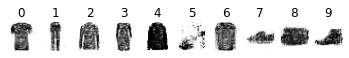

Epoch: 80 G Loss: 0.8643117394447327 D Loss: 1.2985732847849527 Runtime: 36.541100025177
D(x): 0.5495254161993662 D(G(z)): 0.45097813857396446 / 0.44156153418223065


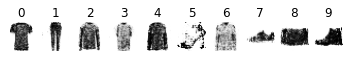

Epoch: 81 G Loss: 0.8585627078374227 D Loss: 1.3114701467196146 Runtime: 36.54205513000488
D(x): 0.5442949458281199 D(G(z)): 0.4538417439142863 / 0.4443742074648539


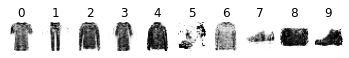

Epoch: 82 G Loss: 0.85177160876592 D Loss: 1.308380921236674 Runtime: 37.422024726867676
D(x): 0.5455516281922659 D(G(z)): 0.4549160299619039 / 0.44566782994270326


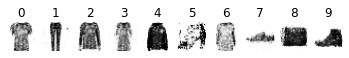

Epoch: 83 G Loss: 0.8625083954175313 D Loss: 1.3036610200246175 Runtime: 37.04995679855347
D(x): 0.5479731936454773 D(G(z)): 0.45204430623054503 / 0.44256981086730957


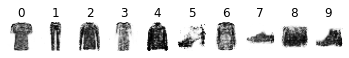

Epoch: 84 G Loss: 0.8747750224749247 D Loss: 1.3019884979565939 Runtime: 36.80846953392029
D(x): 0.5503724884986877 D(G(z)): 0.4501491802851359 / 0.4398859618028005


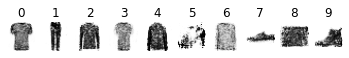

Epoch: 85 G Loss: 0.8650432752609253 D Loss: 1.3041039299964905 Runtime: 36.565348386764526
D(x): 0.5478863785902659 D(G(z)): 0.45145465784072875 / 0.4413379250685374


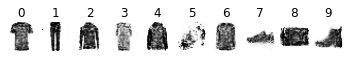

Epoch: 86 G Loss: 0.8508193316777547 D Loss: 1.3140186077753704 Runtime: 37.370511293411255
D(x): 0.5434906999111175 D(G(z)): 0.45616921593348186 / 0.44603328971862793


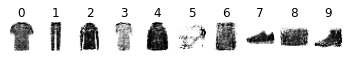

Epoch: 87 G Loss: 0.8731445499420166 D Loss: 1.3085386724472046 Runtime: 36.68428683280945
D(x): 0.5466115172545115 D(G(z)): 0.4519287473519643 / 0.44009251848856606


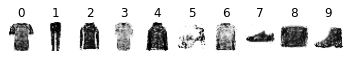

Epoch: 88 G Loss: 0.8542287109692891 D Loss: 1.3074256923357646 Runtime: 36.65223670005798
D(x): 0.5455569584528606 D(G(z)): 0.4538322683811188 / 0.44527451351483666


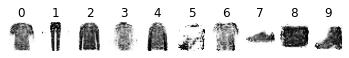

Epoch: 89 G Loss: 0.8618873258272807 D Loss: 1.308564164129893 Runtime: 37.0160596370697
D(x): 0.5457086551030477 D(G(z)): 0.4536381984869639 / 0.44289831366539


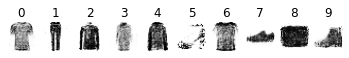

Epoch: 90 G Loss: 0.8536793262481689 D Loss: 1.3106227819442748 Runtime: 37.00968408584595
D(x): 0.544735184542338 D(G(z)): 0.45450064015388486 / 0.44582438003222147


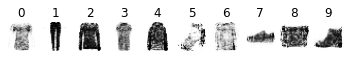

Epoch: 91 G Loss: 0.852494574546814 D Loss: 1.310668053372701 Runtime: 36.511061906814575
D(x): 0.5434890810966492 D(G(z)): 0.454673539463679 / 0.44481585437456767


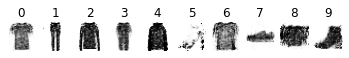

Epoch: 92 G Loss: 0.851868825340271 D Loss: 1.3209097063064574 Runtime: 36.71273064613342
D(x): 0.5417286402543385 D(G(z)): 0.4576384250640869 / 0.4472075140635173


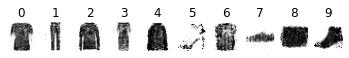

Epoch: 93 G Loss: 0.8584888967196147 D Loss: 1.3073369132359822 Runtime: 36.46607851982117
D(x): 0.5466296984990437 D(G(z)): 0.4539626173178355 / 0.44389858091672263


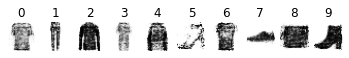

Epoch: 94 G Loss: 0.8792076452891032 D Loss: 1.3025948434829713 Runtime: 36.59464359283447
D(x): 0.5497916676839193 D(G(z)): 0.4492791166782379 / 0.4383885969479879


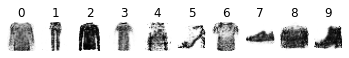

Epoch: 95 G Loss: 0.8584422140757243 D Loss: 1.3081112049102783 Runtime: 36.7062668800354
D(x): 0.5470382185141246 D(G(z)): 0.4534495379924774 / 0.4448110842704773


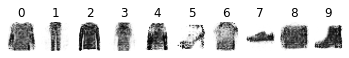

Epoch: 96 G Loss: 0.8539476650555928 D Loss: 1.3093466221491497 Runtime: 36.57159662246704
D(x): 0.5451736969629923 D(G(z)): 0.45423433707555133 / 0.44540864186286927


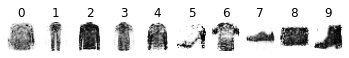

Epoch: 97 G Loss: 0.8485823528925578 D Loss: 1.3160554134368896 Runtime: 36.56173229217529
D(x): 0.5442219194253286 D(G(z)): 0.4574413141886393 / 0.44723293582598367


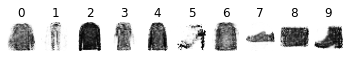

Epoch: 98 G Loss: 0.8517411219278971 D Loss: 1.3136071153640747 Runtime: 35.850114822387695
D(x): 0.5437465746720632 D(G(z)): 0.45534157857894897 / 0.44605606298446654


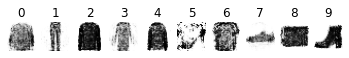

Epoch: 99 G Loss: 0.8562167946179707 D Loss: 1.31506607020696 Runtime: 36.85791230201721
D(x): 0.5451833856741587 D(G(z)): 0.45534591733614604 / 0.44584376293818156


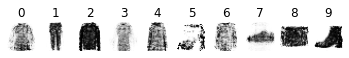

Epoch: 100 G Loss: 0.8543773925145467 D Loss: 1.3098733076095581 Runtime: 35.02971386909485
D(x): 0.5465277747631073 D(G(z)): 0.4548671313126882 / 0.44623046778043113


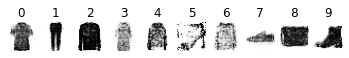

KeyboardInterrupt: ignored

In [0]:
classes = [0,1,2,3,4,5,6,7,8,9]
num_classes = len(classes)
latent_size = 100

# Generator
#G_input_size = latent_size + num_classes
class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()

        # self.main = nn.Sequential(
        #     nn.Linear(latent_size + num_classes,100,bias=True),
        #     nn.ReLU(),
        #     nn.Linear(100,200,bias=True),
        #     #nn.BatchNorm1d(200),
        #     nn.ReLU(),
        #     nn.Linear(200,400,bias=True),
        #     #nn.BatchNorm1d(400),
        #     nn.ReLU(),
        #     nn.Linear(400,784,bias=True),
        #     nn.Tanh()
        # )

        self.embed = nn.Embedding(num_classes, num_classes)
        
        self.model = nn.Sequential(
            nn.Linear(latent_size + num_classes, 256),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(256, 512),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(512, 1024),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(1024, 784),
            nn.Tanh()
        )
        
    def forward(self, noise, labels):
        #labels_onehot = torch.eye(num_classes)[labels].to(device)
        labels_embed = self.embed(labels)
        input = torch.cat((noise, labels_embed), -1)
        return self.model(input)

model_G = Generator().to(device)
print(model_G)

# Discriminator
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()

        # self.main = nn.Sequential(
        #     nn.Linear(784 + num_classes,300,bias=True),
        #     nn.ReLU(),
        #     nn.Linear(300,100,bias=True),
        #     #nn.Dropout(0.5),
        #     nn.ReLU(),
        #     nn.Linear(100,20,bias=True),
        #     #nn.Dropout(0.5),
        #     nn.ReLU(),
        #     nn.Linear(20,1,bias=True),
        #     nn.Sigmoid()
        # )

        self.embed = nn.Embedding(num_classes, num_classes)
        
        self.model = nn.Sequential(
            nn.Linear(784 + num_classes, 1024),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Dropout(0.3),
            nn.Linear(1024, 512),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Dropout(0.3),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Dropout(0.3),
            nn.Linear(256, 1),
            nn.Sigmoid()
        )
    
    def forward(self, images, labels):
        #labels_onehot = torch.eye(num_classes)[labels].to(device)
        labels_embed = self.embed(labels)
        input = torch.cat((images, labels_embed), -1)
        return self.model(input)

model_D = Discriminator().to(device)
print(model_D)

# Training setup
epochs = 100
learning_rate = 0.0002

#batch of fixed noise that we will use to visualize the progression of the generator
test_noise = torch.randn(num_classes, latent_size, device=device)
test_labels = torch.LongTensor(classes).to(device)

#loss funtion
loss_function = nn.BCELoss().to(device)

#Adam optimizers for both G and D
optimizer_D = optim.Adam(model_D.parameters(), lr=learning_rate)
optimizer_G = optim.Adam(model_G.parameters(), lr=learning_rate)

# Training loop
G_fake_images = []
G_losses = []
D_losses = []
iters = 0

for epoch in range(epochs):
    start_time = time.time()
    D_losses_batch = []
    G_losses_batch = []
    D_x = []
    D_G_z1 = []
    D_G_z2 = []
    for images, labels in data_loader:  
        #labels 1,0
        labels_1 = torch.full((batch_size,), 1.0, device=device)
        labels_0 = torch.full((batch_size,), 0.0, device=device)   

        #---------------------------
        # (1) Update D network: maximize log(D(x)) + log(1 - D(G(z)))
        #---------------------------
        ## Train with all-real batch
        #model_D.zero_grad()
        optimizer_D.zero_grad()   
        #real images: flatten into 784 long vector & concat with labels onehot
        real_images = images.view(images.shape[0], -1).to(device)
        real_labels = labels.to(device)
        # Forward pass real batch through D
        real_output = model_D(real_images, real_labels)
        # Store D(x)
        D_x.append(real_output.mean().item())
        # Calculate D's loss on all-real batch
        D_loss_real = loss_function(real_output, labels_1)
        
        ## Train with all-fake batch
        # Generate batch of noises
        noise = torch.randn(batch_size, latent_size, device=device)
        fake_labels = torch.LongTensor(random.choices(classes, k=batch_size)).to(device)
        # Generate fake image batch with G
        fake_images = model_G(noise, fake_labels)
        # Classify all fake batch with D
        fake_output = model_D(fake_images.detach(), fake_labels)
        # Store D(G(z))
        D_G_z1.append(fake_output.mean().item())
        # Calculate D's loss on the all-fake batch
        D_loss_fake = loss_function(fake_output, labels_0)
        
        # Add the gradients from the all-real and all-fake batches
        D_loss = D_loss_real + D_loss_fake
        D_losses_batch.append(D_loss.item())
        # Backward pass
        D_loss.backward()
        # Update D
        optimizer_D.step()
        
        #---------------------------
        # (2) Update G network: maximize log(D(G(z)))
        #---------------------------
        #model_G.zero_grad()
        optimizer_G.zero_grad()
        # Since we just updated D, perform another forward pass of all-fake batch through D
        fake_output = model_D(fake_images, fake_labels)
        # Store D(G(z))
        D_G_z2.append(fake_output.mean().item())
        # Calculate G's loss based on this output
        G_loss = loss_function(fake_output, labels_1)
        G_losses_batch.append(G_loss.item())
        # Backward pass
        G_loss.backward()
        # Update G
        optimizer_G.step()
    
    #Report loss 
    G_loss_avg = mean(G_losses_batch)
    D_loss_avg = mean(D_losses_batch)
    G_losses.append(G_loss_avg)
    D_losses.append(D_loss_avg)
    runtime = time.time() - start_time
    
    print("Epoch:",epoch,"G Loss:",G_loss_avg,"D Loss:",D_loss_avg,"Runtime:",runtime)
    print("D(x):",mean(D_x),"D(G(z)):",mean(D_G_z1),"/",mean(D_G_z2))
    
    # Check how the generator G is doing by generating fake image from test_noise
    with torch.no_grad():
        test_images = model_G(test_noise, test_labels).detach().cpu().numpy()
        test_images = [image.reshape(28,28) for image in test_images]
    figure = plt.figure()
    num_of_images = len(test_images)
    for index in range(0, num_of_images):
        ax = plt.subplot(1, num_of_images, index+1)
        plt.axis('off')
        plt.imshow(test_images[index], cmap='gray_r')
        ax.set_title(index)
    plt.show()
        
#Plot loss
plt.figure(1)
plt.plot(G_losses, label="G")
plt.plot(D_losses, label="D")
plt.title('Loss over epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show() 

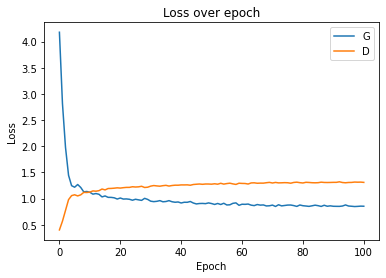

In [0]:
#Plot loss
plt.figure(1)
plt.plot(G_losses, label="G")
plt.plot(D_losses, label="D")
plt.title('Loss over epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show() 